# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and test sets
* Fit a regression model to the dataset using the `statsmodels` library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [3]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [4]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [6]:
# df.columns = [col_formatting(col) for col in df.columns]
df.columns = [col_formatting(col) for col in df.columns]

In [7]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [8]:
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [10]:
# Your code here - Split into train and test
train, test = train_test_split(df)
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
4759,-0.413778,27.6000,-0.175090,-0.829547,-1.703827,-0.525957,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1134,-0.487165,17.4724,-0.342657,-0.132473,0.990651,-0.365010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6397,0.620859,97.5878,-0.314729,-1.003816,-0.667489,-0.043117,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10648,-0.427012,36.5878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10296,-0.481150,37.6971,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Your code here - Fit the actual model

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [12]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     549.8
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:27:31   Log-Likelihood:                -40523.
No. Observations:                8152   AIC:                         8.124e+04
Df Residuals:                    8057   BIC:                         8.190e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7176      1.907     33.938      0.000      60.980      68.456
piece_count                                         72.6436      0.895     81.192      0.000      70.890      74.397
num_reviews                                          6.2599      0.674      9.289      0.000       4.939       7.581
play_star_rating                                     5.5113      0.626      8.802      0.000       4.284       6.739
star_rating                                         -1.2936      0.714     -1.812      0.070      -2.693       0.106
val_star_rating                                     -9.4835      0.646    -14.676      0.000     -10.750      -8.217
ages_10plus                                        122.0432      6.720     18.160      0.000     108.869     135.217
ages_10_14                                         -25.6089      8.910     -2.874      0.004     -43.075      -8.143
ages_10_16                                         -12.4515      4.131     -3.014      0.003     -20.550      -4.353
ages_10_21                                          57.2647      7.426      7.711      0.000      42.707      71.822
ages_11_16                                          -7.2715      5.913     -1.230      0.219     -18.863       4.320
ages_12plus                                         74.4199      5.879     12.658      0.000      62.895      85.944
ages_12_16                                         -52.7777      6.676     -7.905      0.000     -65.865     -39.690
ages_14plus                                         28.1394      4.042      6.962      0.000      20.216      36.063
ages_16plus                                         45.5167      6.179      7.366      0.000      33.404      57.629
ages_1half_3                                        -9.6766      2.380     -4.065      0.000     -14.343      -5.010
ages_1half_5                                        -4.5704      2.997     -1.525      0.127     -10.445       1.304
ages_2_5                                            14.6686      1.672      8.774      0.000      11.391      17.946
ages_4plus                                         -18.9585      5.872     -3.229      0.001     -30.468      -7.449
ages_4_7                                            -7.1236      3.250     -2.192      0.028     -13.495      -0.752
ages_4_99                                           -3.5077      3.403     -1.031      0.303     -10.179       3.164
ages_5plus                                         -10.8518      3.021     -3.592      0.000     -16.774      -4.930
ages_5_12                                          -38.2619      3.156    -12.122      0.000     -44.449     -32.074
ages_5_8                                 

In [ ]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

In [13]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]

p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)

x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()


# Your code here - Remove features which do not appear to be statistically relevant

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.7176,1.907,33.938,0.00,60.980,68.456
piece_count,72.6436,0.895,81.192,0.00,70.890,74.397
num_reviews,6.2599,0.674,9.289,0.00,4.939,7.581
play_star_rating,5.5113,0.626,8.802,0.00,4.284,6.739
star_rating,-1.2936,0.714,-1.812,0.07,-2.693,0.106


In [ ]:
# Your code here - Refit the model

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [ ]:
# Your code here - Continue to refine the model

In [ ]:
# Your code here - Refit the model

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [ ]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

In [15]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.611982367155554),
 ('num_reviews', 3.0109206508562374),
 ('play_star_rating', 1.8389498622399),
 ('val_star_rating', 1.6729304974467027),
 ('ages_10plus', 18.637086457871394),
 ('ages_10_14', 1.1093485010254307),
 ('ages_10_16', 1.178419563104436),
 ('ages_10_21', 7.473822151376092),
 ('ages_12plus', 7.365545698172124),
 ('ages_12_16', 1.1918469535258842),
 ('ages_14plus', 2.2469171790907807),
 ('ages_16plus', 9.367318085302182),
 ('ages_1half_3', 1.0777832246520334),
 ('ages_2_5', 1.3027823897691),
 ('ages_4plus', 1.2024858017634792),
 ('ages_4_7', 1.2000912458790833),
 ('ages_5plus', inf),
 ('ages_5_12', 3.4381919157007643),
 ('ages_6plus', 2.6919284167074737),
 ('ages_6_12', 2.2332292900596125),
 ('ages_6_14', 1.8496423913799065),
 ('ages_7_12', 1.5943000404626968),
 ('ages_7_14', 3.0751164414482317),
 ('ages_8plus', 3.90082590077925),
 ('ages_8_12', 1.3111903806017216),
 ('ages_8_14', 2.43763731084309),
 ('ages_9plus', 1.5842086059096063),
 ('ages_9_12', 1.022906

In [ ]:
# Your code here - Code a way to identify multicollinearity

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [16]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

73 64


In [17]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     720.0
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:29:18   Log-Likelihood:                -40937.
No. Observations:                8152   AIC:                         8.200e+04
Df Residuals:                    8087   BIC:                         8.246e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           75.1310      1.433     52.447      0.000      72.323      77.939
piece_count                                         74.0331      0.690    107.271      0.000      72.680      75.386
num_reviews                                          4.5769      0.640      7.151      0.000       3.322       5.832
play_star_rating                                     7.8027      0.507     15.402      0.000       6.810       8.796
val_star_rating                                    -12.7458      0.512    -24.880      0.000     -13.750     -11.742
ages_10_14                                         -45.6507      9.644     -4.734      0.000     -64.555     -26.746
ages_10_16                                         -22.0840      3.926     -5.625      0.000     -29.780     -14.388
ages_12_16                                         -67.2779      6.802     -9.892      0.000     -80.611     -53.945
ages_14plus                                          3.7543      3.920      0.958      0.338      -3.930      11.439
ages_1half_3                                       -14.6743      3.158     -4.646      0.000     -20.865      -8.484
ages_2_5                                             8.6023      2.021      4.257      0.000       4.641      12.564
ages_4plus                                          -6.5901      9.344     -0.705      0.481     -24.908      11.727
ages_4_7                                           -14.5257      2.195     -6.618      0.000     -18.828     -10.223
ages_5_12                                          -45.1019      2.862    -15.759      0.000     -50.712     -39.492
ages_6plus                                         -36.6884      6.002     -6.113      0.000     -48.454     -24.923
ages_6_12                                          -31.8023      1.876    -16.950      0.000     -35.480     -28.124
ages_6_14                                          -26.0519      4.260     -6.116      0.000     -34.402     -17.702
ages_7_12                                          -29.1583      2.206    -13.219      0.000     -33.482     -24.834
ages_7_14                                          -30.8558      2.292    -13.460      0.000     -35.350     -26.362
ages_8plus                                         -15.3853      4.927     -3.122      0.002     -25.044      -5.726
ages_8_12                                          -27.6687      2.666    -10.379      0.000     -32.895     -22.443
ages_8_14                                          -29.1857      2.135    -13.671      0.000     -33.371     -25.001
ages_9plus                                          16.3886     11.218      1.461      0.144      -5.601      38.378
ages_9_12                                

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

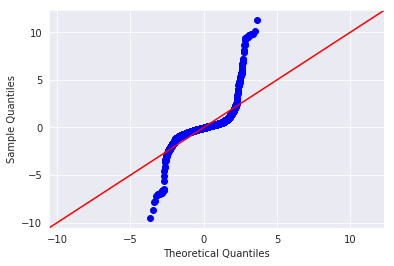

In [18]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

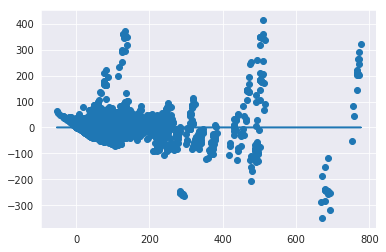

In [19]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

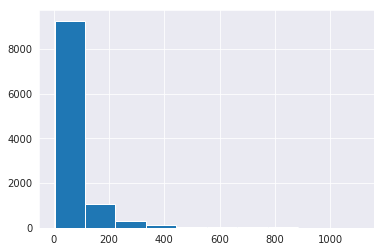

In [20]:
df.list_price.hist()

In [21]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [ ]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

In [ ]:
orig_tot = len(df)
df = df[df.list_price < 450] # subset for outliers
print('percent removed:', (orig_tot - len(df))/orig_tot)
df.list_price = df.list_price.map(np.log)
train, test = train_test_split(df)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

In [ ]:
# Your code here - Check normality assumption

In [ ]:
# Your code here - Check the Homoscedasticity Assumption

In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 